<p style="background-color:#3ab1c8;font-family:Cursive;font-size:200%;color:black;text-align:center;border-radius:120px 20px;padding:20px;margin:20px;"><b>K-MEANS CLUSTERING - Dec 23</b></p>

<p style="background-color:#3ab1c8;font-family:Cursive;font-size:200%;color:black;text-align:center;border-radius:120px 20px;padding:20px;margin:20px;"><b>UNSUPERVISED LEARNING</b></p>

<p style="font-family:Cursive;font-size:100%;color:black;text-align:center;border-radius:10px 10px;"><b>by Nash</b></p>

<b style="font-family:Cursive;font-size:100%;color:black;text-align:right;border-radius:10px 10px;">Follow me [Linkedin](www.linkedin.com/in/nash-n-sungur-333869289) | [Git Hub](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0)</b>

## K_Means Intro

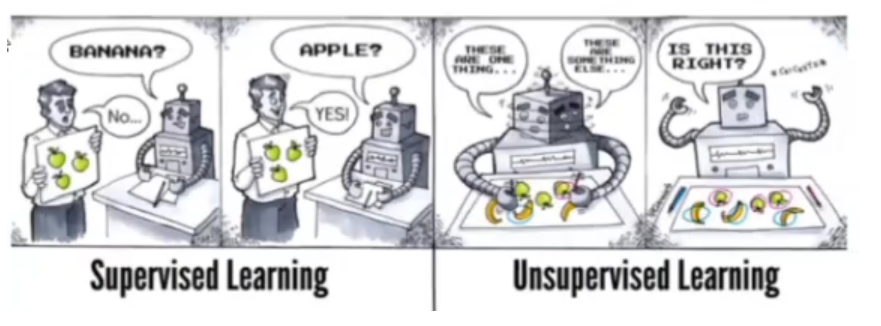

KMeans: **benzer özelliklere sahip veri gruplarını kümeler halinde bulmaya yönelik** bir algoritma.

En yaygın unsupervised öğrenme algoritmaları arasında şunlar bulunur:

**1. K-Means Kümeleme:** Bu algoritma, verileri benzerliklerine göre kümelere ayırır. Her küme, küme içindeki veri noktalarının ortalaması olan bir merkez etrafında gruplanır.

**2. Hiyerarşik Kümeleme:** Veri noktalarını adım adım birleştirerek veya bölererek bir ağaç yapısı (dendrogram) oluşturur. Bu yöntem, veri noktaları arasındaki ilişkilerin daha ayrıntılı bir şekilde incelenmesine olanak tanır.

**3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** Yoğunluk tabanlı bir kümeleme yöntemi olan DBSCAN, veri noktalarını yoğunluklarına göre gruplandırır ve aykırı değerleri (outliers) etkili bir şekilde tespit eder.

**4. Principal Component Analysis (PCA):** Özellik indirgeme (dimensionality reduction) için kullanılan PCA, veri setindeki varyansı maksimize eden yeni bir özellik uzayı oluşturur. Bu, özellikle çok boyutlu veri setlerinde önemlidir.

**5. T-Distributed Stochastic Neighbor Embedding (t-SNE):** Yüksek boyutlu verileri düşük boyutlu bir uzaya indirgeyerek görselleştirmeyi sağlar. Özellikle karmaşık veri setlerinin görsel analizi için kullanışlıdır.

**6. Autoencoders**: Sinir ağları temelli bir unsupervised öğrenme modeli olan autoencoders, veriyi sıkıştırıp sonra tekrar çözerek (reconstruct) veri setindeki önemli özellikleri öğrenmeye çalışır.

**7. Generative Adversarial Networks (GANs)**: İki ağ yapısını (bir üretici ve bir ayırıcı) rekabet halinde kullanarak, gerçekçi veri üretimi yapabilen bir yapay zeka modelidir.

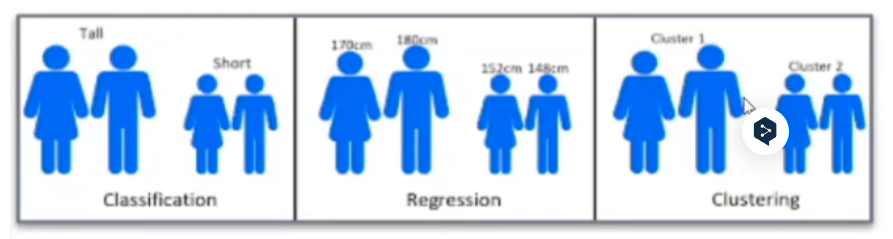

- unsupervised, pattern leri yakalar
- Kümelemede domain knowledge çok önemlidir- 
- **tecrübeye dayalı kümeleme matematiki sonuçtan daha önemlidir**.
- unsupervised da sonuçlar tartışmaya açıktır. kesin değildir..


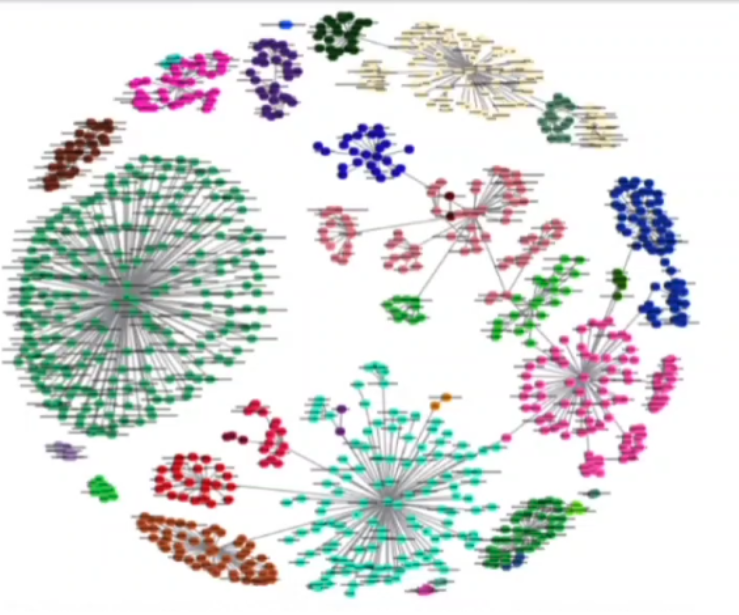

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Centroid atama için simulasyon sayfası..  --> Randomly --> Gaussian


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

* Irıs data setini çalışacağız
* İris Çiçekleri'nin üç türünün ( Setosa,  Virginica ve  Versicolor) her birinden 50 örnekten oluşur.
* Her numuneden ölçülen dört özellik, santimetre cinsinden çanak yaprağı uzunluğu, çanak yaprağı genişliği, taç yaprağı uzunluğu ve taç yaprağı genişliğidir .

In [2]:
df = pd.read_csv("iris.csv")
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

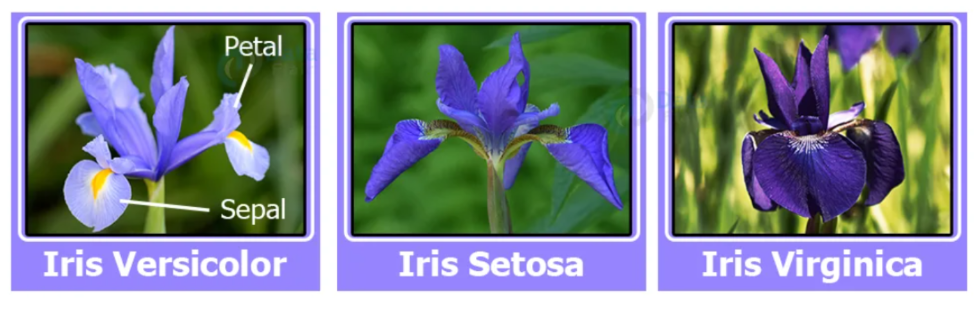

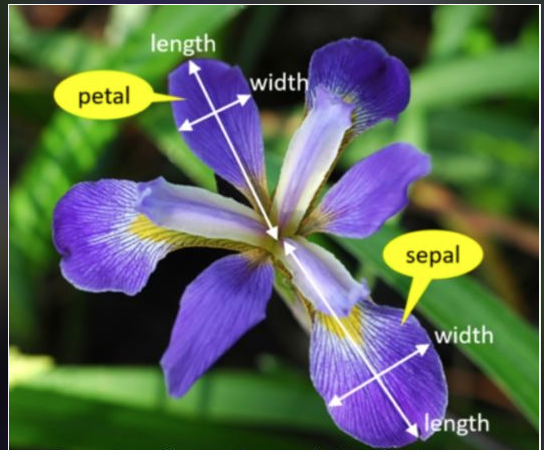

In [3]:
df.species.value_counts() 

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [4]:
df.info()  

# null value yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

data setindeki tüm değerler cm cinsinden verilmiş. 

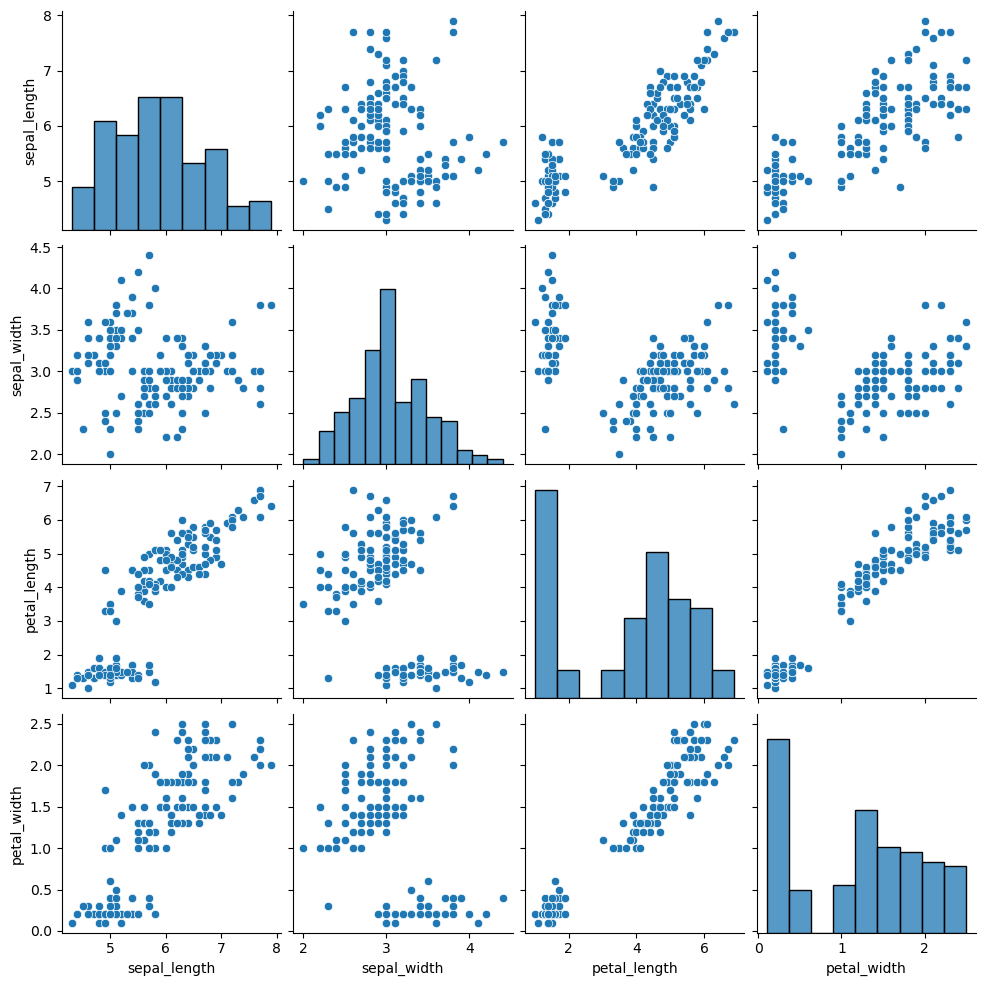

In [6]:
sns.pairplot(df)
plt.show()

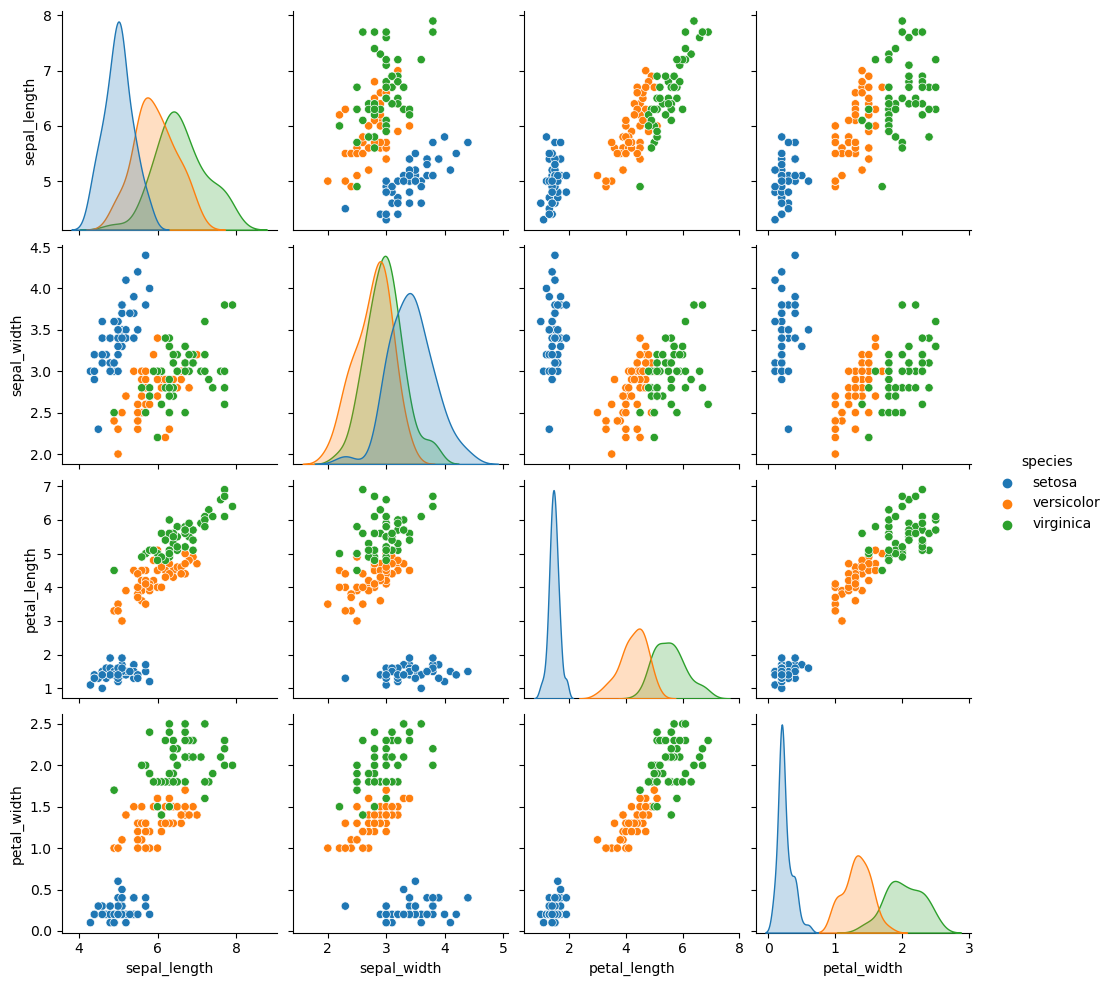

In [7]:
sns.pairplot(data=df, hue="species")
plt.show()

1. Setosa Türü Ayrımı: Setosa türü diğerlerinden belirgin bir şekilde ayrılıyor. Özellikle petal length ve petal width özelliklerinde bu tür, Versicolor ve Virginica'ya göre daha küçük değerlere sahip. Bu, bu özelliklerin Setosa türünü diğerlerinden ayırmak için iyi birer gösterge olduğunu belirtir.

2. Versicolor ve Virginica Karşılaştırması: Versicolor ve Virginica türleri birbirine daha yakın, ancak yine de belirli özelliklerde farklılıklar gözlemlenebilir. Örneğin, petal length ve petal width değerlerinde Virginica, genellikle Versicolor'dan daha büyük değerlere sahiptir.

## Scaling Data

K means algoritmasında mutlaka scale gerekir.
Scale edilmiş datayı tekrar scale yapmak uygun olmaz
K-means algoritması, verilerin ölçeklenmesine duyarlıdır çünkü öklidyen mesafeye dayanır. Bu nedenle, Feature'ların değer aralıkları birbirinden farklıysa, ölçeklendirme genellikle algoritmanın daha iyi sonuçlar vermesine yardımcı olur. K-Means algoritmasında verilerin ölçeklendirilmesi (scaling) önemlidir. K-Means, özellikler arasındaki uzaklıkları kullanarak kümeleri belirler. Eğer farklı özellikler farklı ölçeklerde ise (örneğin, bir özellik milyonlarla ifade edilirken diğeri 0 ile 1 arasında değişiyorsa), algoritma yanıltıcı sonuçlar verebilir. Özellikler arasındaki bu ölçek farklılıkları, K-Means'ın kümeleme sürecini bozabilir.

Bu yüzden, **ölçeklendirme yapmanın veri kümeniz için uygun olup olmadığını belirlemek için** her iki durumu (ölçekli ve ölçeksiz) denemeniz önerilir. Elde edilen kümelerin kalitesini ve algoritmanın performansını değerlendirerek hangi yöntemin daha iyi çalıştığına karar vermelisiniz.

In [8]:
# Eğer Scale yapsaydık alttaki gibi olabilirdi: 

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler() 

# Iris_scaled = scaler.fit_transform(Iris)   # fit_transform

NOT: bu NB' da scale yapılmadan devam edildi. Çünkü scale yapılarak elde edi,len sonuçların daha kötü olduğu izlendi. Feature lar cm cinsinden olduğu için boylke bir sonuç alınmış olaiblir

* burada train ve test split yapmayacağız. doğrudan X'i oluşturacağız. Target variable olmadığı için datanın hepsini X' atayacağız

## K_Means Clustering

KMeans'de işlem sıralaması

* Veri ile alakalı ön işlemler (missing, value, outlier vs)
* Hopkins Testi (data setim kümelemeye uygun mu değil mi) 

Bu testin sonucu, veri setinin kümelenme için uygun olup olmadığını gösterir. Eğer test sonucu düşük bir değer (genellikle 0.5'in altında) veriyorsa, veri setinde anlamlı kümelerin var olduğuna işaret eder ve kümelenme algoritmalarının kullanımı için uygun bir göstergedir. Yüksek bir değer (0.5'e yakın veya daha yüksek), verilerin rastgele veya düzgün dağıldığını ve belirgin kümelerin olmadığını gösterir.

* Optimum cluster sayısını bulmak. Ya domain knowledge ile bakarım yada alttaki metotları uygularım (Elbow, Silhouette...)

* Cluster işleminin kalite kontrolü (ARI-Rand Index)

In [9]:
# Eksik veri kontrolü içn:
#  Eksik veri kontrolü
# missing_values = iris_data.isnull().sum()

# missing_values

In [10]:
Z = df.copy()   # orjinali koruyalım ki sonra tekrar donebilelim

In [11]:
Z.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [12]:
X = Z.drop("species", axis = 1)   # species freature düşürelim

In [13]:
X.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [14]:
X.shape    # sonucu kontrol edelim

(150, 4)

In [15]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42,)

# n_cluster: küme sayısı

* K-Means de fit ve predict genelde beraber kullanılır. Fit denildiğinnde patternleri yakalayıp centroid leri oluşturur, predict deyince veri noktalarını en yakın kümelerine atama yapar. 

In [16]:
K_means_model.fit_predict(X)   # burada  hem fit hem predict bir arada

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 0, 3, 4, 0, 0, 4, 2, 4, 0, 4,
       0, 0, 0, 3, 0, 0, 0, 4, 4, 3, 0, 3, 4, 3, 0, 4, 3, 3, 0, 4, 4, 4,
       0, 3, 3, 4, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3])

Sonuç: fit_predict metodu, her veri noktasının ait olduğu kümenin etiketini içeren bir dizi döndürür. Bu etiketler genellikle 0'dan başlayarak "n_clusters-1'"e kadar olan tam sayılardır.

In [17]:
# fit ve predict i ayrı ayrı kullanırsak:

K_means_model.fit(X)   # eger fit i ayrı verirsek hem bu satır hem alttaki satır yazılacak

KMeans(n_clusters=5, random_state=42)

In [18]:
K_means_model.labels_ 

# Fit ayrı yapılınca bu satır predict olarak çalışmış olacak

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 0, 3, 4, 0, 0, 4, 2, 4, 0, 4,
       0, 0, 0, 3, 0, 0, 0, 4, 4, 3, 0, 3, 4, 3, 0, 4, 3, 3, 0, 4, 4, 4,
       0, 3, 3, 4, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3])

In [19]:
X["Classes"] = K_means_model.labels_    # yukardaki label'ları Class a atayalım
X

sepal_length  sepal_width  petal_length  petal_width  Classes
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        0
146           6.3          2.5           5.0          1.9        3
147           6.5          3.0           5.2          2.0        0
148           6.2          3.4           5.4          2.3        0
149           5.9          3.0           5.1          1.8        3

[150 rows x 5 columns]

NOT: yukardaki işlemlerde n_cluster=5 alarak ve default parametreleri kullanarak KMeans clusterlar oluşturduk.
Fakat modeklin başarılı olup olmadığını şu an bilmiyoruz... Bunun için uzman birisinin Iris data setiyle alakalı Cluster önerisinden bulunması gerekir

--------------------------------------------------------------

## Hopkins test

Hopkins testi, bir veri setinin kümeleme eğilimini ölçmek için kullanılan bir istatistiksel testtir. Bu test, veri setinin ne kadar iyi kümelemeye uygun olduğunu veya veri setindeki örneklerin ne kadar rastgele dağıldığını belirlemeye yardımcı olur. K-Means gibi kümeleme algoritmaları öncesinde veri setinin bu analizini yapmak, algoritmanın etkinliğini değerlendirmek için önemlidir. Hopkins istatistiği, 0 ile 1 arasında bir değer alır.

**0.5 in altı kabul edileblir olup 0.3 den az olması istenen bir durumdur**

Hopkins test adım adım basit bir açıklama:

**Örneklem Seçimi**: Öncelikle, veri setinizden rastgele seçilmiş bir grup nokta alırsınız. Bu, testin temelini oluşturur.

**En Yakın Komşu Mesafeleri**: Bu örneklemdeki her bir nokta için, veri setindeki en yakın komşusuna olan mesafeyi hesaplarsınız. Bu, veri setinizdeki noktaların birbirine ne kadar yakın olduğunu gösterir.

**Rastgele Noktalar Üretimi**: Ardından, veri setinizin aynı boyutlarına sahip rastgele noktalar üretirsiniz. Bu, tamamen rastgele bir dağılımın nasıl olacağını temsil eder.

**Rastgele Noktaların En Yakın Komşu Mesafeleri**: Üretilen bu rastgele noktalar için de, veri setinizdeki en yakın komşuya olan mesafeleri hesaplarsınız.

S**kor Hesaplama**: Son olarak, veri setinizdeki gerçek noktaların en yakın komşu mesafelerinin toplamı ile rastgele noktaların en yakın komşu mesafelerinin toplamını karşılaştırarak bir skor hesaplarsınız. Bu skor, 0 ile 1 arasında bir değerdir.

Eğer skor 0.5 civarında ise, veri setinizin rastgele dağıldığı anlamına gelir; yani belirgin bir kümeleme eğilimi yoktur. Eğer skor 0'a yakınsa, veri setinizin güçlü bir kümeleme eğilimi gösterdiği anlamına gelir.

In [ ]:
# Hatalı kütüphane !!

# pip install pyclustertend  
#  from pyclustertend import hopkins 

In [20]:
X = X.drop("Classes", axis =1)   # yukarda tahm,n edilen degerleri tekrar devre dışı bıraktık

In [21]:
X

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [ ]:
# normalde alttaki fonksiyonumuz pyclustertend'ın hopkins kütüphanesinde var. Ancak oluşabilecek hatalara karşı 
# doğrudan fonksiyonun kendisini kullanacağız. Bundan dolayı pyclustertend'ı install etmemize gerek yoktur! 

In [ ]:
# alttaki kod blogu hopkins testini manuel olarak hesaplayacak
# 0'a yakın olması daha yi kumeleme gostergesi olacaktır

In [22]:
from sklearn.neighbors import BallTree  # BallTree, veri noktaları arasındaki uzaklık sorgularını hızlı bir şekilde gerçekleştirmek için kullanılan bir veri yapısıdır. 
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


In [23]:
X.shape

(150, 4)

alttaki kod ile fonksiyon veri setinin tamamını kullanarak Hopkins istatistiğini hesaplayacaktır. Bu, genellikle büyük veri setleri için zaman alıcı olabilir ve veri setinin yapısını tam olarak yansıtan bir örneklem oluşturmayabilir. Kümeleme eğilimini daha hızlı ve etkili bir şekilde değerlendirmek için genellikle veri setinin bir alt kümesi örneklem olarak kullanılır.

In [24]:
hopkins(X, X.shape[0])  # büyük datalarda %10-20 gibi alınaibir(misal olarak 150 binlik datada)

0.1695722495668686

In [25]:
hopkins(X, 60) # 60 adet gözlem için 

0.15133385512882166

NOT: 0.30 un altında olması iyi bir kümeleme olabileceğini söylüyor

buraya kadar default değerler üzerinden model kurduk, buna uygun kümeleme yaptık, skor alık. Küme sayımız = 5 olarak yapmıştık

şimdi optimumu küme sayısını bulma çalışmamıza balayalım

# Choosing The Optimal Number of Clusters

Eğer bir domain knowledge yoksa nasıl yapacağız?.Matematik yöntemler kullanmak gerekecek.. Elbow gibi..

## Elbow metod

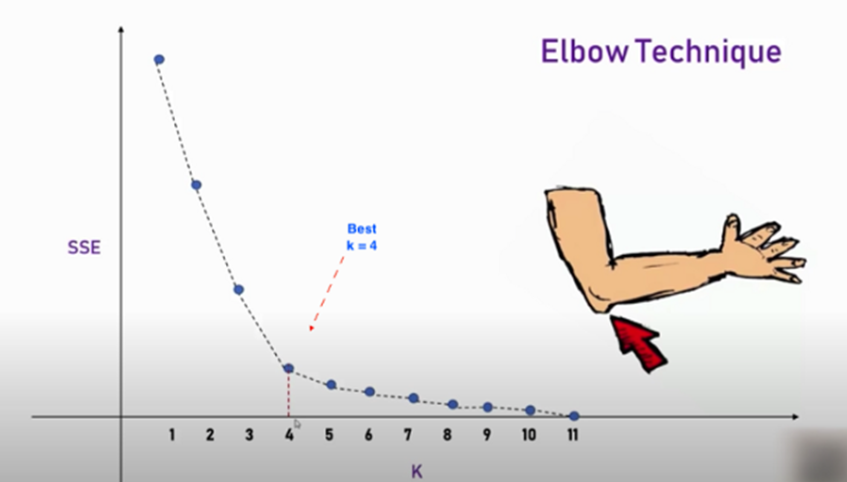

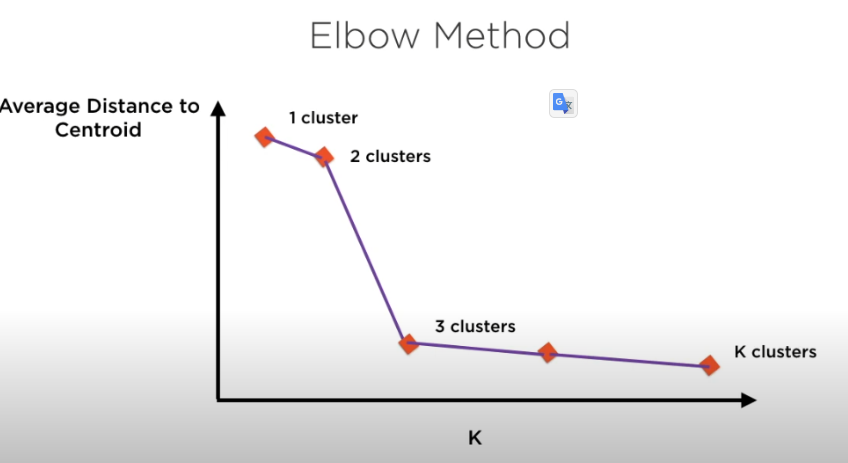

bu metodun temelinde "inertia" kavramı vardır. 
Inertia, veri setindeki her noktanın, o noktanın ait olduğu kümenin merkezine olan mesafelerinin karelerinin toplamıdır. Başka bir deyişle, inertia, kümeler içindeki varyansın bir ölçüsüdür. Düşük bir inertia değeri, küme içindeki noktaların merkeze daha yakın olduğunu ve dolayısıyla kümelerin daha sıkı olduğunu gösterir. Bu, genellikle daha iyi bir kümeleme performansı anlamına gelir.

SSD: K-Means modelinin her küme içindeki noktaların kümelerinin merkezine olan mesafelerinin karelerinin toplamını ifade eder.

In [26]:
ssd = []    # inertia  .. SSD, "Sum of Squared Distances" (mesafelerin karelerinin toplamı)

K = range(2,10)   # minimum 2 küme ile başladık

for k in K:                                          # Her bir farklı küme sayısı için K-Means modelini oluşturur ve eğitir.
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

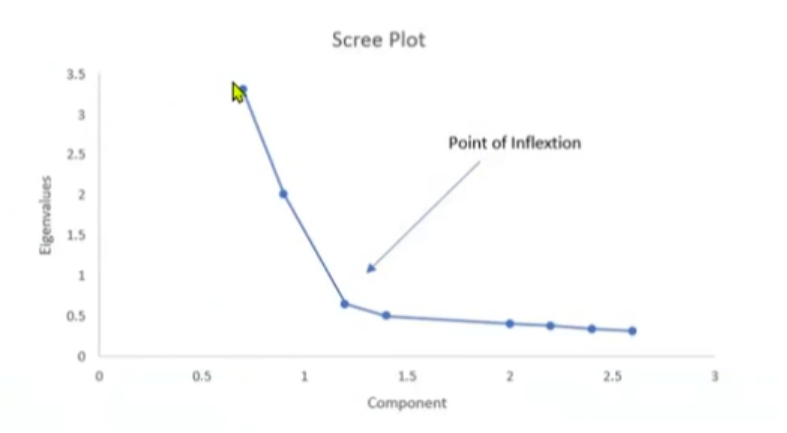

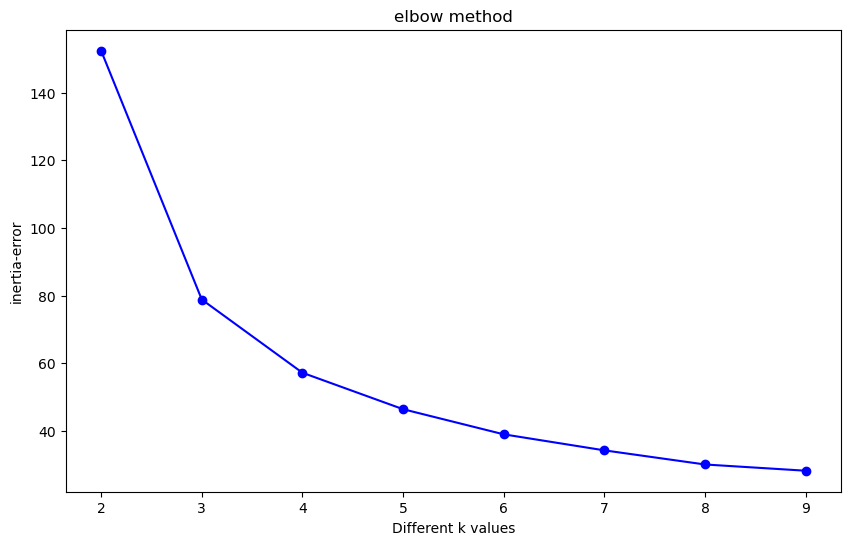

In [27]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

Burada ilk keskin düşüşün 3 te olduğu görülüyor.

In [28]:
ssd   # yukarsda hesaplanmıştı..  sum of sqaured distance

[152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.461172672672674,
 39.03998724608725,
 34.3058152958153,
 30.132440554614476,
 28.290635241951033]

In [29]:
pd.Series(ssd).diff()

#153 den 73 e düşüşde 1,1 kat, 73den 21e düşüşde 2,4 kat..
# ilk satır 0 çünkü "152 - hiçbirşey"
# en büyük düşüşü arıyoruz

0          NaN
1   -73.496510
2   -21.622968
3   -10.767301
4    -7.421185
5    -4.734172
6    -4.173375
7    -1.841805
dtype: float64

In [30]:
# yukardaki değerleri dataframe e dönüştürelim

df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1        NaN
2  73.496510
3  21.622968
4  10.767301
5   7.421185
6   4.734172
7   4.173375
8   1.841805

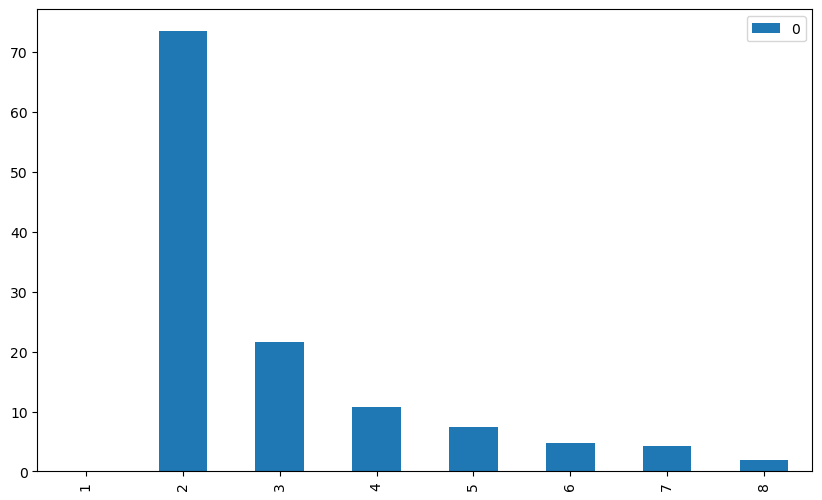

In [31]:
df_diff.plot(kind='bar'); # alttaki grafiğe göre en sert düşüş noktasını görelim


en sert düşüşün 3 de olduğu görülüyor. Fakat yellowbrik üzerinden de bunu teyit etmeye çalışacağız..

## Second Method - Yellowbrick (n_cluster selection)

In [ ]:
# pip install yellowbrick

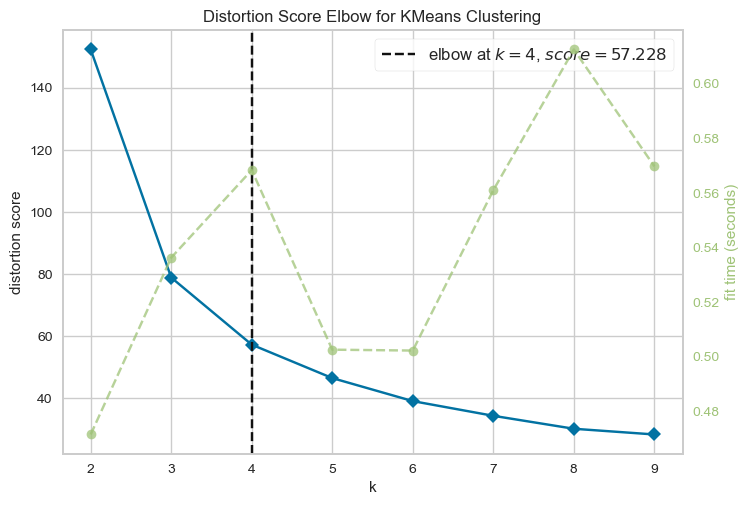

In [32]:
from yellowbrick.cluster import KElbowVisualizer   # yellowbrick ile elbow daki grafikte seçim yapar

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) # algoritmanın 2 ile 10 arasındaki her küme sayısı için modeli değerlendireceği anlamına gelir.

visualizer.fit(X)        # Fit the data to the visualizer.. inertia metoduna ggöre gösterir
visualizer.show();

## Silhouette analysis

Kümelemede 2 öneml, kriter: 1. Küme içi elemanların birbirine yakın olması (eleman mesafelerinin minimum olması) 2. Kümelerin birbirinden uzak olması  (küme merkezlerinin birbirine mesafesninin max olması)

Silhouette analizi, kümeleme performansını değerlendirmek için kullanılan bir metriktir. Küme içi benzerliği ve kümeler arası benzerliği karşılaştırarak, kümelerin ne kadar iyi ayrıldığını gösterir. Silhouette değeri, her veri noktası için hesaplanır ve bu değerlerin ortalaması alınarak genel bir kümeleme kalitesi ölçümü elde edilir.
Siluet puanı Minkowski mesafesini veya Öklid mesafesini kullanır ve değeri [-1, 1] arasında değişir

Silhouette değeri -1 ile 1 arasında değişir:

1: i veri noktası kendi kümesinde iyi yerleştirilmiş ve diğer kümelerden uzakta demektir.

0: i veri noktası iki küme arasında bir sınıra yakın demektir.

−1: i veri noktası yanlış bir kümeye atanmış demektir.

bu değerlerin "eşik" değerleri kesin bir şekilde belirlenmemiştir. Ancak, pratikte, ortalama silhouette değerinin yüksek olması (**genellikle 0.5'ten büyük**) kümelenmenin iyi olduğunu gösterirken, düşük değerler (genellikle 0.25'ten düşük) kümelenmenin iyi olmadığını veya daha iyi yapılabileceğini gösterebilir.

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
silhouette_score(X, K_means_model.labels_)   # yukarda default olarak n_cluster =5 seçilmişti

0.49123997967644867

In [35]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6810461692117465
For n_clusters=3, the silhouette score is 0.5528190123564102
For n_clusters=4, the silhouette score is 0.49805050499728815
For n_clusters=5, the silhouette score is 0.49123997967644867
For n_clusters=6, the silhouette score is 0.36483400396700366
For n_clusters=7, the silhouette score is 0.3542978877198859
For n_clusters=8, the silhouette score is 0.34873453772194


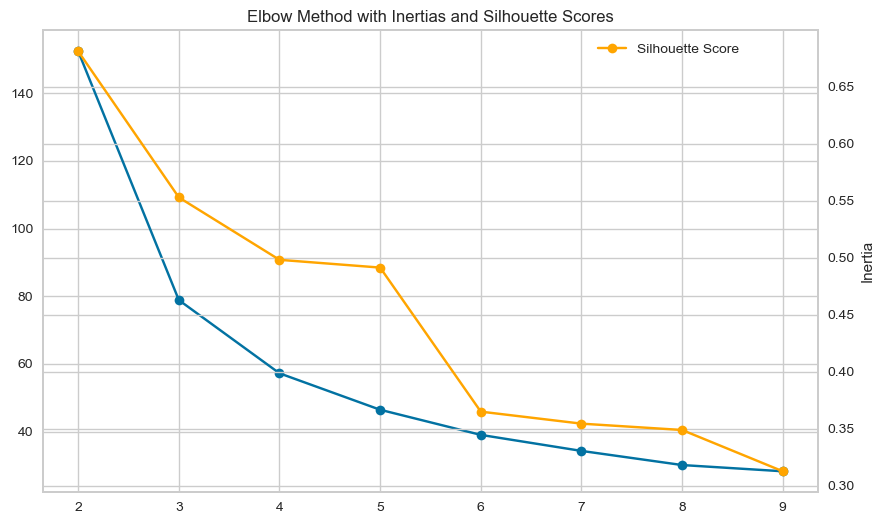

In [37]:
# Elbow ve Silhoutee skorunu bir arada gösteren grafik

inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))
# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')
# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')
# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

yukardaki grafikten en iyi dengenin 3 de oldugunu ifade edebiliriz

## Silhouette Visualizer

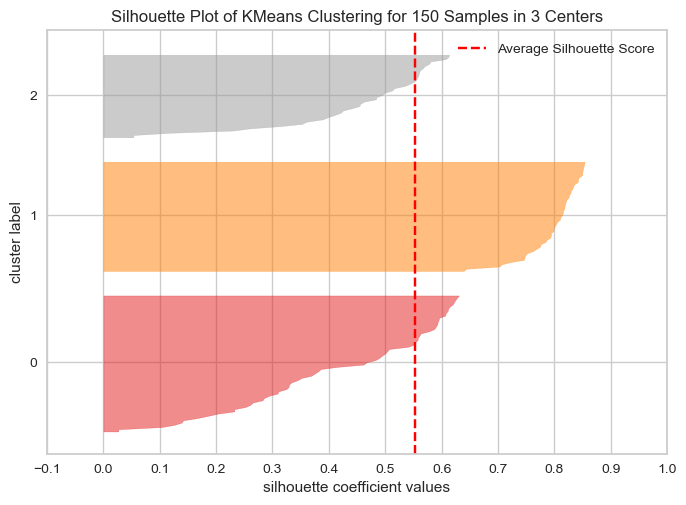

In [42]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)  # kmeans = 3 olarak seçtik ve ona göre çizim yaptı
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

silhouette score yuksek - inertia dusuk olmali

**Önemli NOT**: farklı değerler çıkarsa, elbow da çıkan küme sayısınını ( burada 3) silhouette skoruna bakın. (For n_clusters=3, the silhouette score is 0.5528190123564102) burada 0.55 çıkmış. eğer bu değer 0.50 nin üzerinde ise o zaman elbow daki Inertia değerini alaiblirsiniz.. burada elbow 3 demişken yellowbrick 4 demişti..hangisini alcağız ? slhoutee eğer elbow un önerdiği değeri 0.5 den büyük skor verirse o zaman elbow inertia yı alablirsiniz..

## Building the model based on the optimal number of clusters

In [ ]:
# n_cluster olarak 3 sayısına karar verdim ve onunla yürüyeceğim

In [43]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [44]:
model.labels_    # n_cluster= 3 için yapılan atama (predict) sonuçları

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [45]:
clusters = model.labels_

In [46]:
X.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [47]:
X["predicted_clusters"] = clusters

In [48]:
X   # burada pr3edict olan class ları göruyoruz

sepal_length  sepal_width  petal_length  petal_width  predicted_clusters
0             5.1          3.5           1.4          0.2                   1
1             4.9          3.0           1.4          0.2                   1
2             4.7          3.2           1.3          0.2                   1
3             4.6          3.1           1.5          0.2                   1
4             5.0          3.6           1.4          0.2                   1
..            ...          ...           ...          ...                 ...
145           6.7          3.0           5.2          2.3                   2
146           6.3          2.5           5.0          1.9                   0
147           6.5          3.0           5.2          2.0                   2
148           6.2          3.4           5.4          2.3                   2
149           5.9          3.0           5.1          1.8                   0

[150 rows x 5 columns]

eğer uzman görüşü alma imkanı olmasa idi NB burada sona erebilirdi...

bundan sonraki aşama; uzman görüşünü almak olmalı

In [49]:
# orjinal data setini çağıralım

df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [50]:
df["predicted_clusters"] = clusters

In [51]:
df.head()   # species feature'ı bize uzman gorusunu temsil ediyor

sepal_length  sepal_width  petal_length  petal_width species  \
0           5.1          3.5           1.4          0.2  setosa   
1           4.9          3.0           1.4          0.2  setosa   
2           4.7          3.2           1.3          0.2  setosa   
3           4.6          3.1           1.5          0.2  setosa   
4           5.0          3.6           1.4          0.2  setosa   

   predicted_clusters  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1

In [ ]:
# Yaptıgımız kumelenin ne kadar dogru oldugunu pandas daki crosstab fonksiyonu ile görelım
# crosstab : bir veri çerçevesi (df) içindeki iki sütun arasında bir çapraz tablo (contingency table) oluşturur.

In [52]:
ct = pd.crosstab(df.predicted_clusters, df.species) # ayrılan class'lara göre tahmin ve labels karşılaştırıyor.
ct

species             setosa  versicolor  virginica
predicted_clusters                               
0                        0          48         14
1                       50           0          0
2                        0           2         36

In [ ]:
# 0. clusters 48 versicolor ve 14 virginica tahmin etmiş
# 1.   ''     50 setosa  tahmin etmiş 0 hata
# 2.   ''     36 virginica  ve 2 versicolor tahmin etmiş
# toplamda 16 hata yapmış

## Adjust Rand Score

Rand Index (Rand score), kümeleme algoritmasının performansını değerlendiren bir metriktir. Özellikle, iki farklı veri kümesi kümelemesinin - genellikle biri algoritma tarafından üretilen tahminler, diğeri ise gerçek etiketler - ne kadar benzer olduğunu ölçer

 Rand Index değeri 0 ile 1 arasında değişir. 1, mükemmel bir eşleşmeyi gösterirken, 0 tamamen rastgele bir eşleşmeyi ifade eder. Yüksek bir Rand Index değeri, algoritmanın veri kümesini gerçek sınıflara yakın bir şekilde kümelediğini gösterir.
 
 0.1 ve altı : Uyum yok zayıf uyum

0.1 - 03    : Düşük bir uyum

0.3 - 0.5   : Orta derece uyum

0.5 - 1.0   : İyi uyum

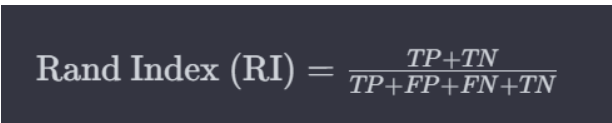

In [53]:
from sklearn.metrics import adjusted_rand_score

In [54]:
df_end = df
df_end

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     predicted_clusters  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
..                  ...  
145                   2  
146                   0  
147                   2  
148                   2  
149                   0  

[150 rows x 6 columns]

In [ ]:
# adjusted_rand_score(labels_true, labels_pred)

In [55]:
adjusted_rand_score(df_end.species, df_end.predicted_clusters)

0.7302382722834697

In [ ]:
# bu skor 1' e yakın oldugu için ortalamanın üzerindedir

## Visualization Clusters

görselleşti,rmeyi benim modelimin tahmini üzerinden yapıyorum (predicted_clusters)

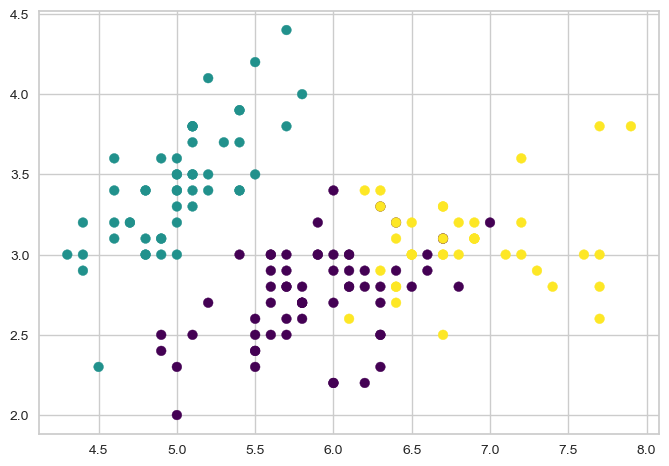

In [56]:
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis");

# df["sepal_length"] : X ekseni değerleri.. çiçeklerin sepallerinin (çanak yapraklarının) uzunluklarını içerir.

# df["sepal_width"]: y ekseni değerleri ..sepal_width adlı sütununu temsil eder, sepallerin genişliklerini içerir.

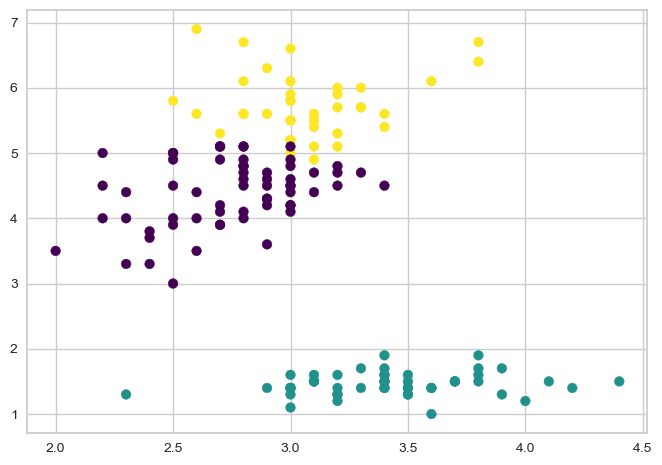

In [57]:
plt.scatter(X["sepal_width"], X["petal_length"], c = X.predicted_clusters, cmap = "viridis");

# usttekine gore x ve y yer değiştirildi

In [58]:
# her bir feature için centroid koordinatlarını bulalım..  Centroid lerin x,y koordinatları

centers = model.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [59]:
centers[:,0] # centers of sepal_length feature... 

array([5.9016129, 5.006    , 6.85     ])

In [60]:
centers[:,1] # centers of sepal_width feature 

array([2.7483871 , 3.428     , 3.07368421])

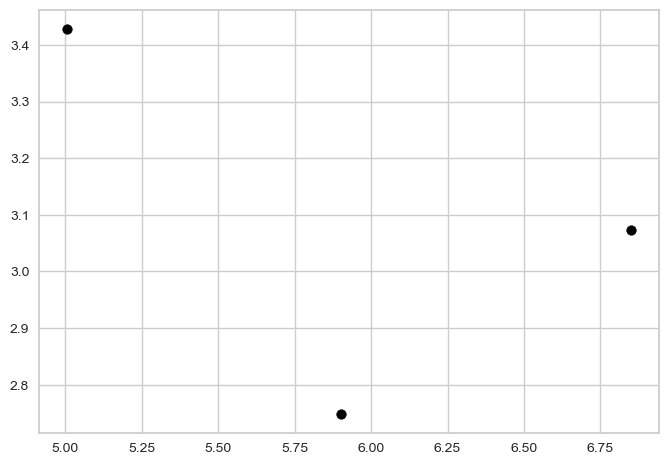

In [61]:
plt.scatter(centers[:,0], centers[:,1], c = "black");

# merkez noktalarını görelim çizimde

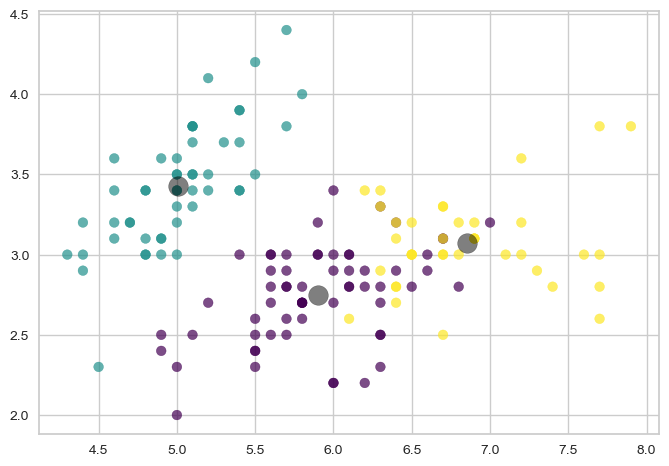

In [62]:
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5); 

## Remodeling according to discriminating features

In [ ]:
# ayırt edici özelliklere göre yeniden modelleme yapalım. 16 adet hatalı kumelemeyi azaltmak için bu denemeyi yapıyorum

In [63]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species  \
0           5.1          3.5           1.4          0.2  setosa   
1           4.9          3.0           1.4          0.2  setosa   
2           4.7          3.2           1.3          0.2  setosa   
3           4.6          3.1           1.5          0.2  setosa   
4           5.0          3.6           1.4          0.2  setosa   

   predicted_clusters  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1

In [64]:
df.iloc[:, [0,1,2,3,5]].head()   # species ı devre dışı bırakalım

sepal_length  sepal_width  petal_length  petal_width  predicted_clusters
0           5.1          3.5           1.4          0.2                   1
1           4.9          3.0           1.4          0.2                   1
2           4.7          3.2           1.3          0.2                   1
3           4.6          3.1           1.5          0.2                   1
4           5.0          3.6           1.4          0.2                   1

In [65]:
# tüm featurel larımın tahmin ettiğim değerlere göre ortalamalarını alalım

clus_pred = df.iloc[:, [0,1,2,3,5]].groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters         0      1         2
sepal_length        5.901613  5.006  6.850000
sepal_width         2.748387  3.428  3.073684
petal_length        4.393548  1.462  5.742105
petal_width         1.433871  0.246  2.071053

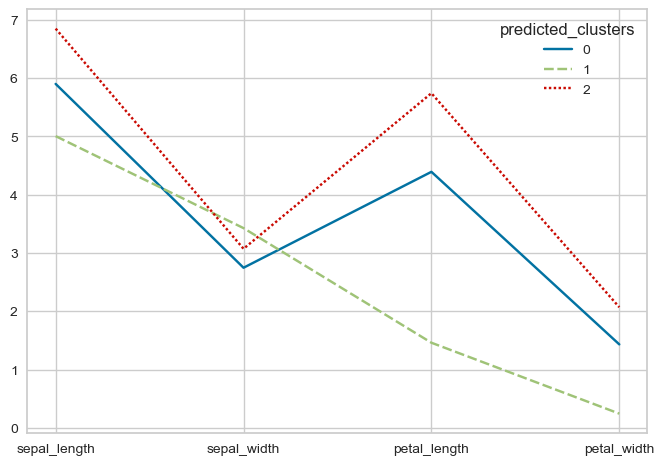

In [66]:
sns.lineplot(data = clus_pred);

üstteki grafikteki X eskeninde verilen değerlere göre sepal_width de birbirine yakınlık sözkonusu, petal_length de ise çok iyi ayrım oldugunu anlıyoruz.petal_width de de yine iyi ayrım sözkonusu..grafikler birbirinden uzakta, ayrım iyi yapılmış demektir bu.  
ortalamalar birbirine yakın olunca iyi cluster lama olmuyor, ortalamalar birbirinden uzak olunca iyi cluster ypılmış demektir. bu grafikte ortalamaların birbirine mesafesi  görülüyor

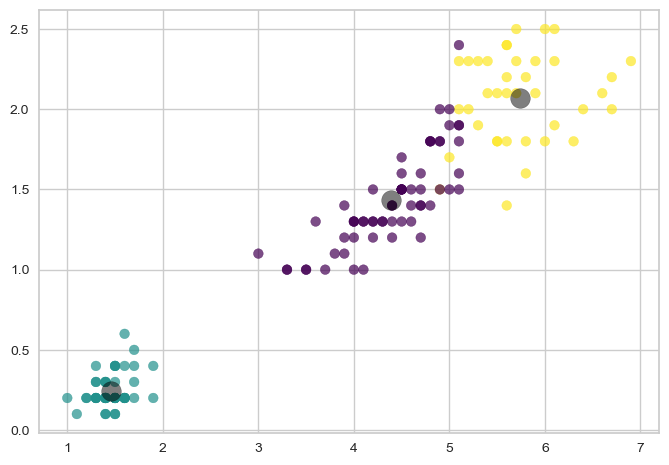

In [67]:
plt.scatter(X["petal_length"], X["petal_width"], c = X.predicted_clusters, cmap = "viridis", alpha =0.7)
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)

bu iki fetaure üzerinden modeli yeniden kurup birde bu şekilde deneme yapacağım

**NOT** : En baskın olan yani en iyi ayırt edilen, kenarda bırakarak diğerleri üzerinden yol yürümek önemli bir stratejidir burada. bunu feature engineering üzerindne de örnekleyebilirim. Bir denemede şu oldu: bir modelde en baskın olan feature ı devre dışı bırakınca model daha da geliştirileiblir oldu. 

In [68]:
X2 = X.iloc[:, [2,3]]
X2

petal_length  petal_width
0             1.4          0.2
1             1.4          0.2
2             1.3          0.2
3             1.5          0.2
4             1.4          0.2
..            ...          ...
145           5.2          2.3
146           5.0          1.9
147           5.2          2.0
148           5.4          2.3
149           5.1          1.8

[150 rows x 2 columns]

## Hopkins test

In [69]:
# yukarda kullandıgımız hopkins def function u kullanalım

hopkins(X2, X2.shape[0]) 

0.10214163902924753

Hopkins test skoru daha iyi geldi (0'a daha yakın)

## Elbow metod

In [70]:
ssd = []

K = range(2,10)

for k in K:
    model3 = KMeans(n_clusters =k)
    model3.fit(X2)
    ssd.append(model3.inertia_)

Text(0.5, 1.0, 'elbow method')

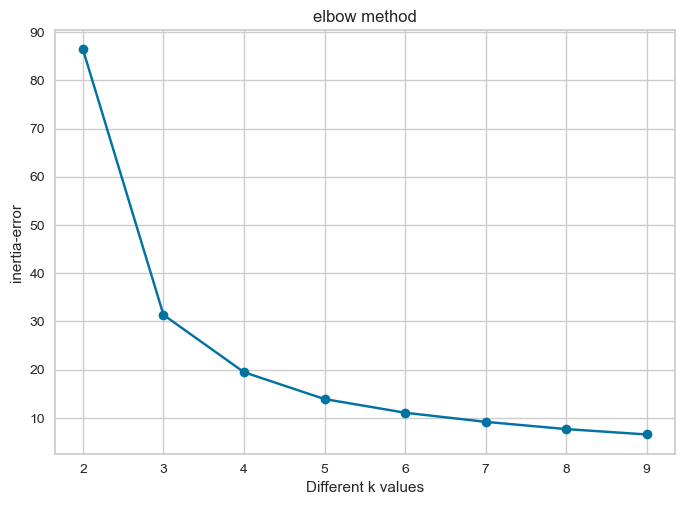

In [71]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [72]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1        NaN
2  55.018861
3  11.888358
4   5.566092
5   2.829685
6   1.893357
7   1.499401
8   1.117928

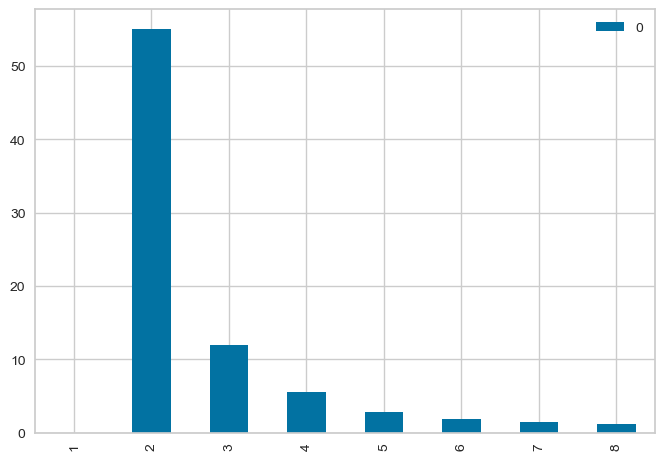

In [73]:
df_diff.plot(kind='bar');

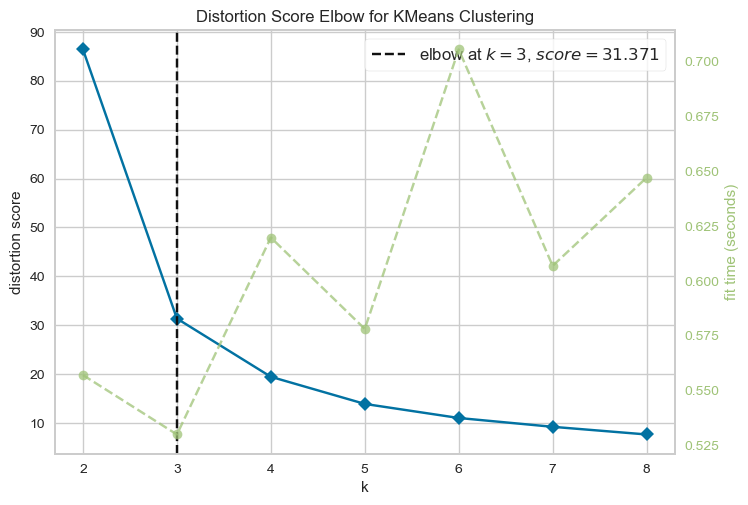

In [74]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

yani , bu ele aldığın 2 feature üzerinden gidersen n_cluster=3 uygun görünüyor

## Silhouette analysis

In [75]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.7653904101258123
For n_clusters=3, the silhouette score is 0.6604800083974887
For n_clusters=4, the silhouette score is 0.6128714659599253
For n_clusters=5, the silhouette score is 0.5883732712110276
For n_clusters=6, the silhouette score is 0.5775461720224432
For n_clusters=7, the silhouette score is 0.5748225948262902
For n_clusters=8, the silhouette score is 0.5902255624998716


In [ ]:
n_cluster=3 için daha önce 0.55 olan skor şimdi 0.66 oldu. yani daha da iyileşti

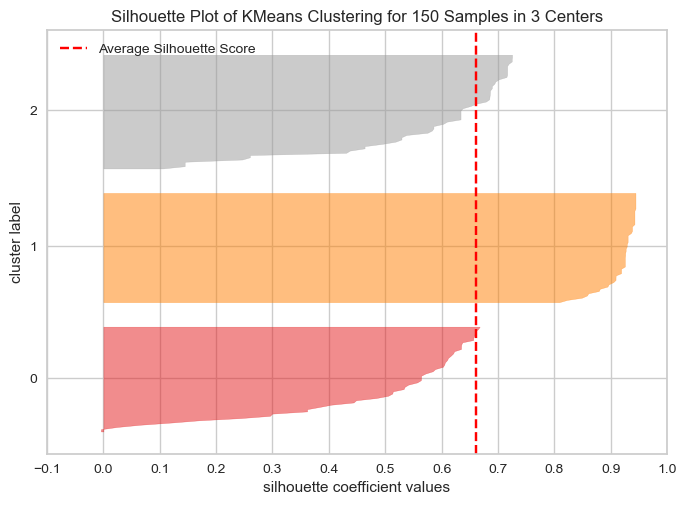

In [76]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

## Building the model based on the optimal number of clusters

X2 ye göre modeli eğitelim

In [77]:
final_model = KMeans(n_clusters =3, random_state=42)
final_model.fit_predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
X2["species"] = df["species"]

In [79]:
X2

petal_length  petal_width    species
0             1.4          0.2     setosa
1             1.4          0.2     setosa
2             1.3          0.2     setosa
3             1.5          0.2     setosa
4             1.4          0.2     setosa
..            ...          ...        ...
145           5.2          2.3  virginica
146           5.0          1.9  virginica
147           5.2          2.0  virginica
148           5.4          2.3  virginica
149           5.1          1.8  virginica

[150 rows x 3 columns]

In [80]:
X2["predicted_clusters"] = final_model.labels_

In [81]:
X2

petal_length  petal_width    species  predicted_clusters
0             1.4          0.2     setosa                   1
1             1.4          0.2     setosa                   1
2             1.3          0.2     setosa                   1
3             1.5          0.2     setosa                   1
4             1.4          0.2     setosa                   1
..            ...          ...        ...                 ...
145           5.2          2.3  virginica                   0
146           5.0          1.9  virginica                   0
147           5.2          2.0  virginica                   0
148           5.4          2.3  virginica                   0
149           5.1          1.8  virginica                   0

[150 rows x 4 columns]

## Adjust Rand Score

In [82]:
adjusted_rand_score(X2.species, X2.predicted_clusters)

0.8856970310281228

daha önce 0.73 lan skor şimdi 0,90 lara yaklaştı

## Compare results

In [83]:
# ct for 2 features
pd.crosstab(X2.predicted_clusters, X2.species)

species             setosa  versicolor  virginica
predicted_clusters                               
0                        0           2         46
1                       50           0          0
2                        0          48          4

Hatalı kümeleme sayısı 16 dan 6 ya düştü

eski skorların tablşosu alttadır:
    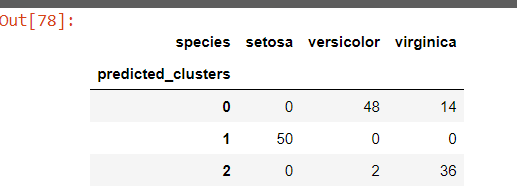

## Prediction cluster of new data

In [85]:
new_data = [[1.7, 0.2]]

In [86]:
final_model.predict(new_data)

array([1])

final_model adındaki eğitilmiş K-Means modelinin predict metodunu kullanarak new_data üzerinde tahmin yapar. predict metodu, verilen yeni veri noktasının hangi kümeye ait olduğunu belirler. Burada final_model, daha önce eğitilmiş ve K-Means algoritmasına dayanan bir modeldir.

Bir segmentasyon modelinin başarısı aşağıdaki yönlerde özetlenebilir:

- İşletmenin hedefleri ile uyum,

- Tanımlanan boyutların netliği

- Zamanlamanın dikkatli bir şekilde değerlendirilmesi

- Kümelerin iş hedeflerine uyarlanmasında esneklik

- Zaman içinde istikrar

Sonuçta başarılı segmentasyon, farklı müşteri profillerini anlamak ve onlarla etkileşime geçmek için kapsamlı ve etkili bir çerçeve oluşturur.

https://towardsdatascience.com/customer-segmentation-more-than-clustering-a7226a9ff138